In [12]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleaned_df = pd.read_csv('processed_data.csv')
cleaned_df.head(10)

,Title,Genre,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,OriginalPrice,DiscountPercent,DiscountedPrice,ReleaseYear,ReleaseMonth,ReleaseDay,Rating
0,iRacing,"Massively Multiplayer, Racing, Simulation, Sports",0,0,iRacing.com Motorsport Simulations,iRacing.com Motorsport Simulations,2906.0,3379.0,473.0,175000.0,0.66,59500.0,2015,1,12,0.828828
1,HumanitZ,"Action, Adventure, RPG, Early Access",0,0,Yodubzz Studios,Freedom Games,1480.0,1940.0,460.0,260000.0,0.20,208000.0,2023,9,18,0.735973
2,Ratopia,"Adventure, Casual, Indie, Simulation, Strategy...",1,0,Cassel Games,Cassel Games,1553.0,1746.0,193.0,260000.0,0.10,234000.0,2023,11,5,0.848305
3,The Exit 8,"Adventure, Indie, Simulation",0,0,KOTAKE CREATE,KOTAKE CREATE,3060.0,3260.0,200.0,59000.0,0.00,59000.0,2023,11,29,0.900236
4,Mind Over Magic,"Simulation, Early Access",0,0,Sparkypants,Klei Publishing,474.0,510.0,36.0,220000.0,0.10,198000.0,2023,12,14,0.863713
5,Cobalt Core,"Indie, Strategy",1,0,Rocket Rat Games,Brace Yourself Games,1230.0,1261.0,31.0,260000.0,0.20,208000.0,2023,11,8,0.920010
6,Dragonheir: Silent Gods,"Adventure, Massively Multiplayer, RPG, Strateg...",0,0,SGRA Studio,Nuverse Pte. Ltd.,1007.0,1544.0,537.0,0.0,0.00,0.0,2023,10,26,0.635512
7,Void Crew,"Action, Adventure, Early Access",0,0,Hutlihut Games,Focus Entertainment,2020.0,2217.0,197.0,286000.0,0.20,228800.0,2023,9,7,0.870706
8,Bopl Battle,Action,0,0,Johan Grönvall,Zapray Games,1928.0,1993.0,65.0,142000.0,0.20,113600.0,2023,11,16,0.919922
9,(the) Gnorp Apologue,"Casual, Indie, Simulation, Strategy",0,0,Myco,(Myco),914.0,942.0,28.0,90000.0,0.00,90000.0,2023,12,14,0.910444


##### Question 1: Câu hỏi đặt ra là đối với những game có downloadable content (withDLC) thì giá tiền cần để mua game đó có nhiều hơn những game không kèm theo downloadable content hay không?

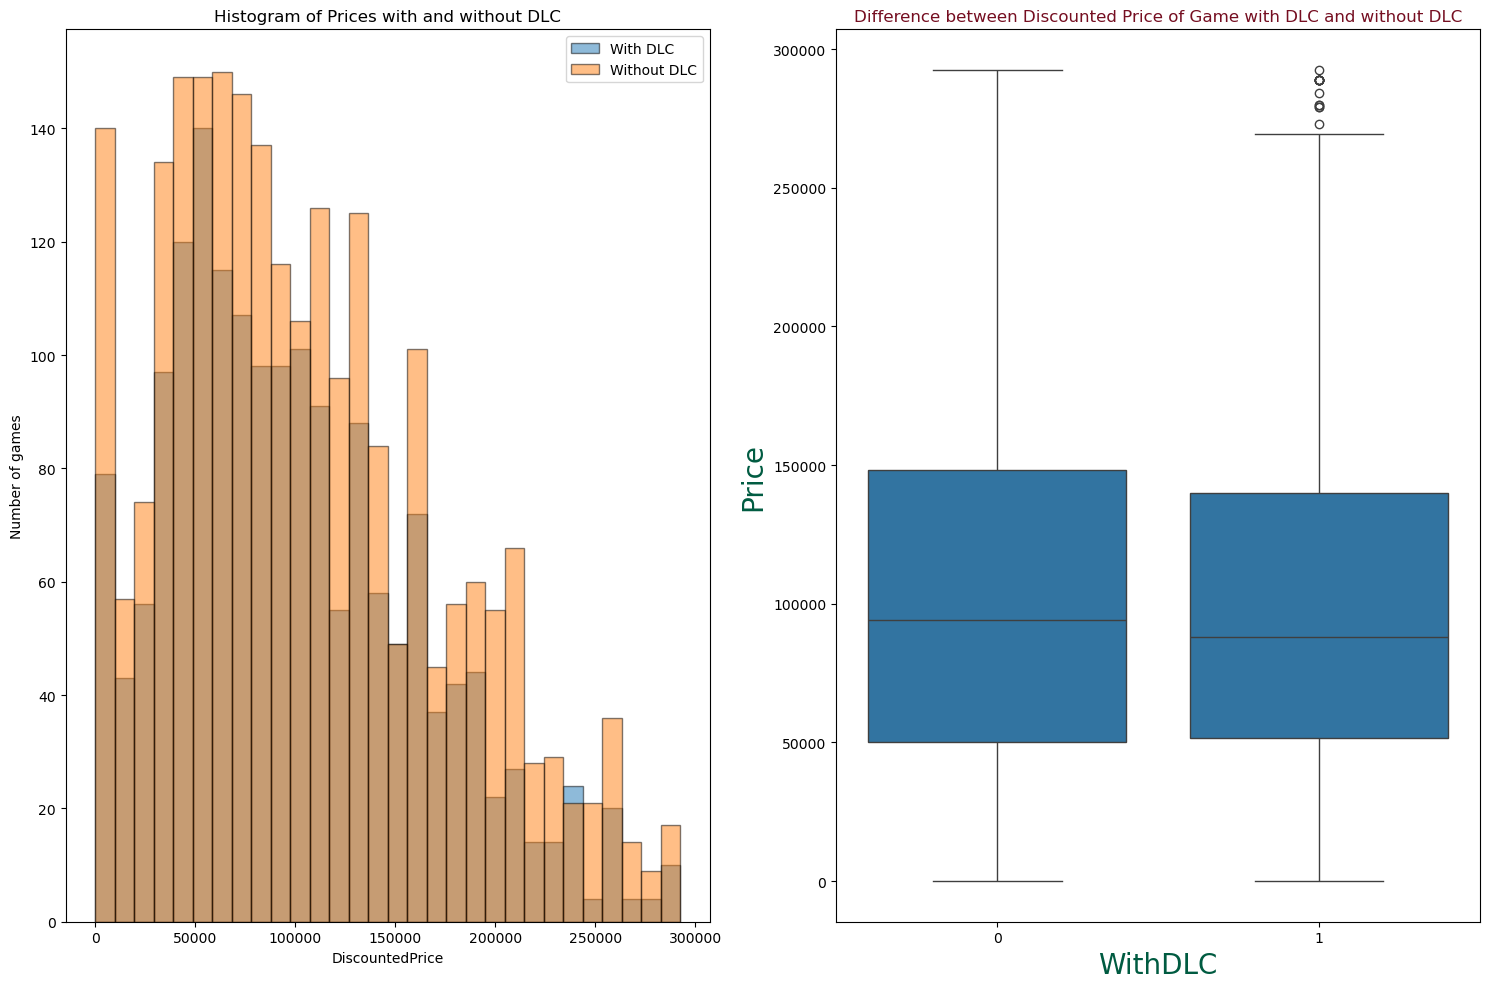

In [3]:
df_with_dlc = cleaned_df[cleaned_df['withDLC'] == 1]
df_without_dlc = cleaned_df[cleaned_df['withDLC'] == 0]

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(df_with_dlc['DiscountedPrice'], bins = 30, alpha = 0.5, label = 'With DLC', edgecolor = 'black')
axs[0].hist(df_without_dlc['DiscountedPrice'], bins = 30, alpha = 0.5, label = 'Without DLC', edgecolor = 'black')
axs[0].legend(loc = 'upper right')
axs[0].set_title('Histogram of Prices with and without DLC')
axs[0].set_xlabel('DiscountedPrice')
axs[0].set_ylabel('Number of games')

sns.boxplot(x = 'withDLC', y = 'DiscountedPrice', data = cleaned_df, ax = axs[1])
axs[1].set_title('Difference between Discounted Price of Game with DLC and without DLC', color = '#750E21')
axs[1].set_xlabel('WithDLC', color = '#005B41', fontsize = 20)
axs[1].set_ylabel('Price', color = '#005B41', fontsize = 20)

plt.tight_layout()
plt.show()

In [4]:

print(df_with_dlc[['withDLC', 'DiscountedPrice']].describe())
print(df_without_dlc[['withDLC', 'DiscountedPrice']].describe())

       withDLC  DiscountedPrice
count   1733.0      1733.000000
mean       1.0     99290.392383
std        0.0     62611.025242
min        1.0         0.000000
25%        1.0     51450.000000
50%        1.0     88000.000000
75%        1.0    140000.000000
max        1.0    292500.000000
       withDLC  DiscountedPrice
count   2396.0      2396.000000
mean       0.0    104341.191569
std        0.0     68091.283078
min        0.0         0.000000
25%        0.0     50150.000000
50%        0.0     94000.000000
75%        0.0    148312.500000
max        0.0    292500.000000


##### Kết luận: Nhìn vào 2 biểu đồ boxplot và bảng dữ liệu trên, ta có thể thấy giá tiền của game có kèm theo downloadable content có xu hướng cao hơn những game không có mặc dù game không có DLC có số lượng nhiều hơn

### Question 2: Mỗi thể loại game thường được giảm giá như thế nào?
Thông thường, ta hay cho rằng những sản phẩm giảm giá nhiều có nghĩa là những món đó đã cũ hoặc đã lỗi thời, thế còn game thì sao?

Việc mỗi thể loại game giảm giá nhiều hay ít có ảnh hưởng gì tới việc những thể loại game đó có đang là xu hướng trong thị trường game hiện tại hay không? Điều này có quyết định đến việc phát triển một game hay không?

Đầu tiên, ta lấy cột `Genre` và `DiscountPercent`

In [5]:
genre_df = cleaned_df[['Genre', 'DiscountPercent']]
genre_df

,Genre,DiscountPercent
0,"Massively Multiplayer, Racing, Simulation, Sports",0.66
1,"Action, Adventure, RPG, Early Access",0.20
2,"Adventure, Casual, Indie, Simulation, Strategy...",0.10
3,"Adventure, Indie, Simulation",0.00
4,"Simulation, Early Access",0.10
...,...,...
4124,"Action, Adventure",0.70
4125,"Adventure, Casual, Simulation",0.50
4126,"Adventure, Casual, Indie",0.15
4127,"Indie, Simulation, Strategy",0.20


Vì `Genre` là một cột đặc biệt, vì mỗi sample có thể có nhiều thể loại, do đó để thể hiện rõ những thể loại nào đang phát triển, ta sẽ chia `Genre` ra thành từng sample:

In [6]:
explode_genre_df = genre_df.assign(Genre=genre_df['Genre'].str.split(', ')).explode('Genre')
explode_genre_df = explode_genre_df.reset_index(drop=True)
explode_genre_df

,Genre,DiscountPercent
0,Massively Multiplayer,0.66
1,Racing,0.66
2,Simulation,0.66
3,Sports,0.66
4,Action,0.20
...,...,...
11644,Indie,0.20
11645,Simulation,0.20
11646,Strategy,0.20
11647,Adventure,0.70


Tính trung bình `DiscountPercent` của từng `Genre`

In [7]:
mean_discount_df = explode_genre_df.groupby('Genre')['DiscountPercent'].mean().reset_index()
mean_discount_df

,Genre,DiscountPercent
0,Action,0.428246
1,Adventure,0.440192
2,Animation & Modeling,0.128947
3,Audio Production,0.483333
4,Casual,0.365674
5,Design & Illustration,0.308333
6,Early Access,0.225675
7,Education,0.488571
8,Free to Play,0.000000
9,Game Development,0.356364


Thể hiện giá trị lên đồ thị:

<Axes: xlabel='DiscountPercent', ylabel='Genre'>

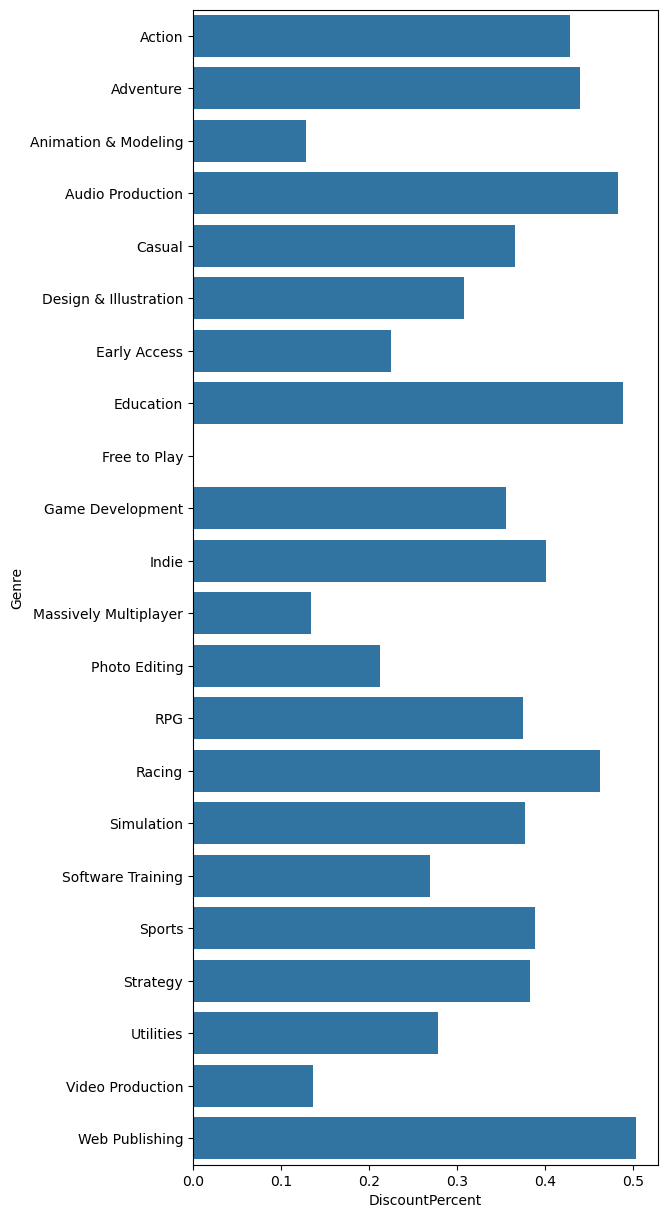

In [8]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=mean_discount_df['DiscountPercent'], y=mean_discount_df['Genre'], ax=ax)

Có vẻ như phần lớn các thể loại game đều có discount trên 30%, chỉ có một số thể loại có discount thấp (Animation & Modeling, Massive Multiplayer,...) chỉ discount dưới 20%. Tuy nhiên đây thường là những thể loại game mang tính giáo dục hơn là giải trí (chẳn hạn như Video Production, Photo Editing), trong khi đó những thể loại game mang tính giải trí, có sức hút nhiều hơn thì discount vẫn trên 30%. 

Vậy ta có thể kết luận game giảm giá nhiều hay ít không ảnh hưởng gì nhiều đến việc những thể loại game đó có đang hot hay không.

Đây là chỉ là đánh giá mang tính chủ quan. Vì mỗi game có một hoặc rất nhiều thể loại, có discount khác nhau. Do đó xử lí như này sẽ không đánh giá đúng 100%, tuy nhiên nó cũng cho chúng ta 1 góc nhìn chung về những game có thể loại như vậy thường có lượng discount trung bình như thế nào.

### Question 3: Những game được nhiều sự quan tâm đánh giá từ người chơi, có khuyến mãi như thế nào ??
Ở câu hỏi 2, ta đã tìm hiểu mỗi thể loại game giảm giá nhiều hay ít ảnh hưởng như thế nào đến xu hướng phát triển của game đó. Vậy những game có khuyến mãi lớn có được người dùng quan tâm nhiều hay không?

Ta có thể phân vùng đánh giá game như sau:\
**0% - 19%:** Negative\
**20% - 39%:** Mostly Negative\
**40% - 69%:** Mixed\
**70% - 79%:** Mostly Positive\
**80% - 100%:** Positive

Do data cào về khá chênh lệch về số lượng game được làm theo từng năm, nên ta sẽ lấy năm 2022 và 2023 để đối chiếu và so sánh.

In [9]:
discount_2022 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2022), ['Rating', 'DiscountPercent']]
discount_2023 = cleaned_df.loc[(cleaned_df['ReleaseYear'] == 2023), ['Rating', 'DiscountPercent']]

def classify_percentage(percentage):
    if percentage >= 0 and percentage < 0.2:
        return 'Negative'
    elif percentage >= 0.2 and percentage < 0.4:
        return 'Mostly Negative'
    elif percentage >= 0.4 and percentage < 0.7:
        return 'Mixed'
    elif percentage >= 0.7 and percentage < 0.8:
        return 'Mostly Positive'
    elif percentage >= 0.8 and percentage <= 1:
        return 'Positive'
    else:
        return 'Invalid'

discount_2023['Conclusion'] = discount_2023['Rating'].apply(classify_percentage)
discount_2022['Conclusion'] = discount_2022['Rating'].apply(classify_percentage)

Ta tính giá trị trung bình của `DiscountPercent` cho năm 2022 và 2023

In [10]:
mean_2022 = discount_2022.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2022 = mean_2022.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()
mean_2023 = discount_2023.groupby(['Conclusion'])['DiscountPercent'].mean()
mean_2023 = mean_2023.to_frame().rename(columns= {'DiscountPercent': 'MeanDiscountPercent'}).reset_index()

Tạo đồ thị violinplot để so sánh sự phân bố của từng mức `Conclusion`:

[Text(0.5, 102.72222222222219, 'Rating Conclusion'),
 Text(132.34722222222223, 0.5, 'Discount Percent')]

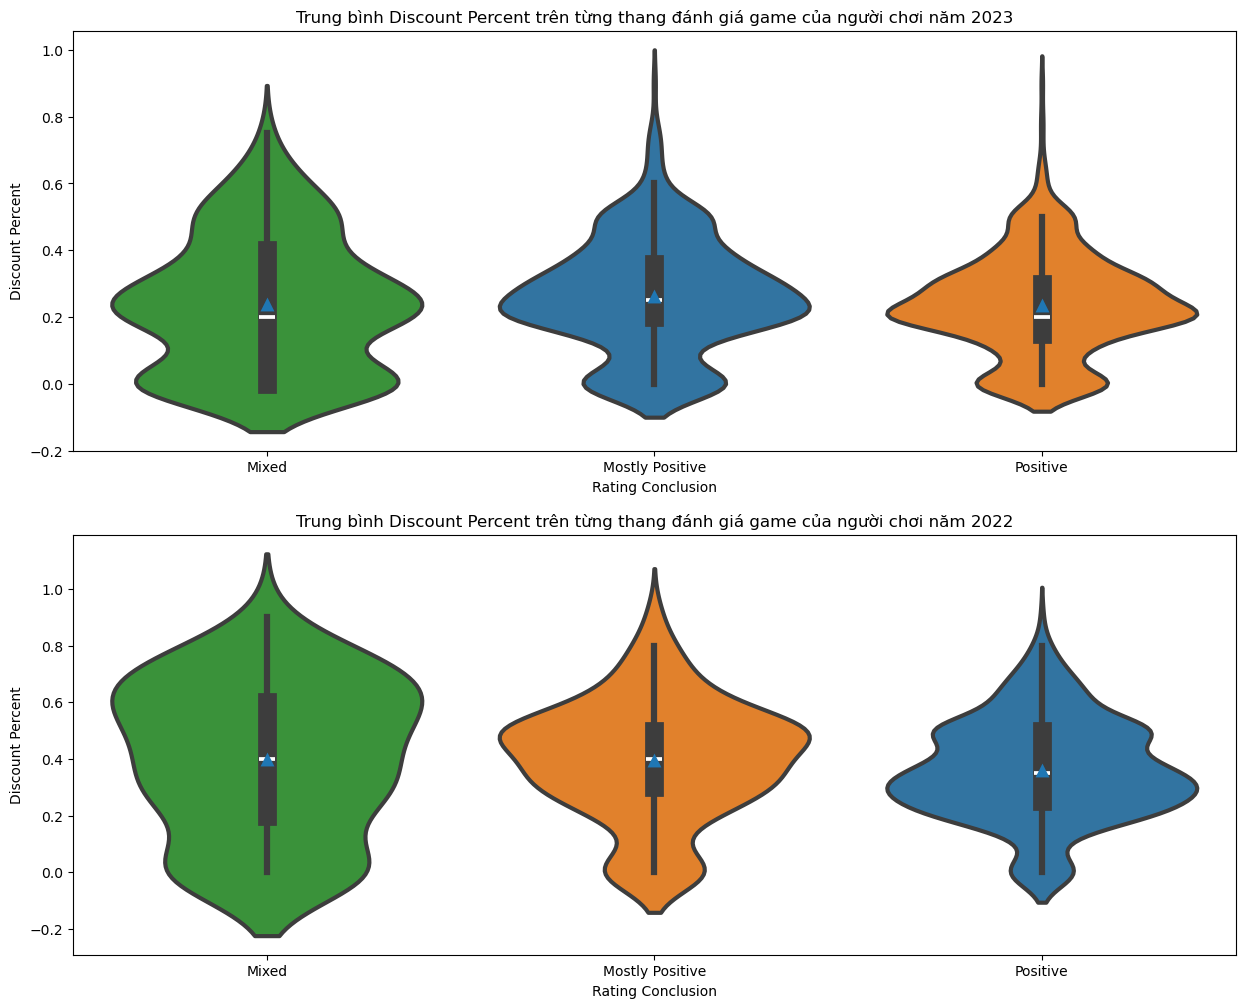

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

sns.swarmplot(data = mean_2023, x = 'Conclusion', y = 'MeanDiscountPercent', ax = axes[0], marker = '^', s = 10, dodge= True)
sns.swarmplot(data = mean_2022, x = 'Conclusion', y = 'MeanDiscountPercent', s = 10,ax = axes[1], marker = '^', dodge= True)

sns.violinplot(data = discount_2023, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[0])
sns.violinplot(data = discount_2022, x = 'Conclusion', y = 'DiscountPercent', hue='Conclusion', linewidth=3, ax=axes[1])
axes[0].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2023')
axes[1].set_title('Trung bình Discount Percent trên từng thang đánh giá game của người chơi năm 2022')
axes[0].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')
axes[1].set(xlabel = 'Rating Conclusion', ylabel = 'Discount Percent')

Dựa vào biểu đồ, ta thấy sự biến động của các kết luận đánh giá dựa vào DiscountPercent trung bình trong năm 2023 và năm 2022 là có khác nhau đôi chút:
- Với năm 2023, theo mỗi loại đánh giá, lượng người chơi đánh giá nhiều nhất cũng là nơi mà tại đó cũng chính là giá trị trung bình của `DiscountPercent`, và giá trị trung bình nằm ở khoảng xấp xỉ **25%**.
- Trước đó, năm 2022 có giá trị trung bình `DiscountPercent` nằm ở khoảng **40%**, trùng với giá trị median của từng `Conclusion`. Tuy nhiên, số lượng người chơi đánh giá game nhiều nhất không nằm ngay trong khoảng này, mà nó có thể nằm bất kì đâu (như `Mixed` thì nhiều nhất khi `DiscountPercent` khoảng **60%**, `Mostly Positive` là **45%** và `Positive` là khoảng **30%**), số lượng người chơi đánh giá game cũng trải rộng hơn chứ không tập trung vào một số `DiscountPercent` nhất định, và số lượng người chơi đánh giá cũng tăng dần trong khoảng trung bình của nó **(20% - 40%)**.

Vậy với sự khác biệt giữa sự phân bố của từng mức đánh giá trong năm 2023 và 2022 có ý nghĩa gì không?\
**Dự đoán:** nhìn vào biểu đồ, ta có thể giúp thấy thường những vùng mà có chứa `DiscountPercent` trung bình là tập trung nhiều lượng người chơi đánh giá nhất hoặc đó là vùng cũng có một số lượng lớn người chơi đánh giá. Điều này có thể giúp cho các nhà phát triển có thể đưa ra được một chiến lược giảm giá phù hợp để vừa có thể giữ được lợi nhuận cho game và đạt được một số lượng người chơi tốt.